In [4]:
# Import Libraries
import numpy as np

## Building Linear Regression 

In [3]:
class Linear_Regression():
    
    # Intiating the parameters(Hyperparameters) that are learning rate and number of iterations
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    # Fit the data to the model    
    def fit(self, X, Y):
        
        # Number of training examples and number of features
        # m: number of training data points, n: number of features(Excluding the Target column)
        self.m, self.n = X.shape
        
        # Intiating weight(m: slope) and Bias(c: Intercept)
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Implementing the gradient Desent
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)
        
        # Calculate Graident
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction)/self.m
        
        # updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db 
    
    def predict(self, X):
        
        return X.dot(self.w) + self.b  # Y = wX + b

## Using the Build linear regression

## Import Dependencies

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Collection and Preprocessing

In [7]:
salary_data = pd.read_csv("salary_data.csv")

In [8]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [9]:
salary_data.shape

(30, 2)

In [10]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [12]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
# Splitting into target and features
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [16]:
print(X)
Y

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

## Splitting the data into training and testing data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

## Training Linear Regression Model

In [34]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [35]:
model.fit(X_train, Y_train)

In [36]:
# print the model parameters w and b
print("Weight: ", model.w[0])
print("Bia: ", model.b)

Weight:  9514.400999035135
Bia:  23697.406507136307


Equation for the problem will be:</br>
Y = 9514* X + 23698</br>
Y: Salary</br>
X: Experience

In [37]:
prediction_test = model.predict(X_test)

In [38]:
print("Test data prediction: ", prediction_test)

Test data prediction:  [ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


## Visualizing the actual value and predicted value

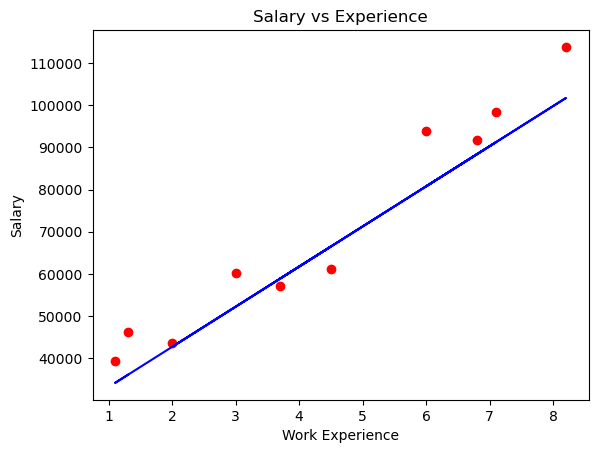

In [39]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, prediction_test, color = 'blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()